In [1]:
import os
import json
import statistics
from matplotlib import pyplot as plt

In [2]:
os.chdir('./server/Linux')
print(os.getcwd())

/home/jsh/GitHub/SWCON_Project/server/Linux


In [3]:
with open('ServerSpeedResult.json') as file:
    data = json.load(file)
py_data = data['ServerLanguage']['python']
js_data = data['ServerLanguage']['javascript']

languages = ['Python 3', 'JS (node)']
################### JSON GET ########################
json_get_py = py_data['json']['GET']
json_get_js = js_data['json']['GET']

json_get_best = list(map(lambda x : float(format(x,'.2f')),[min(json_get_py), min(json_get_js)]))
json_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(json_get_py), max(json_get_js)]))
json_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(json_get_py), statistics.median(json_get_js)]))
#####################################################
################## JSON POST ########################
json_post_py = py_data['json']['POST']
json_post_js = js_data['json']['POST']

json_post_best = list(map(lambda x : float(format(x,'.2f')),[min(json_post_py), min(json_post_js)]))
json_post_worst = list(map(lambda x : float(format(x,'.2f')),[max(json_post_py), max(json_post_js)]))
json_post_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(json_post_py), statistics.median(json_post_js)]))
#####################################################
################## Calc GET #########################
calc_get_py = py_data['calc']['GET']
calc_get_js = js_data['calc']['GET']

calc_get_best = list(map(lambda x : float(format(x,'.2f')),[min(calc_get_py), min(calc_get_js)]))
calc_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(calc_get_py), max(calc_get_js)]))
calc_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(calc_get_py), statistics.median(calc_get_js)]))
#####################################################
################## Html GET #########################
html_get_py = py_data['html']['GET']
html_get_js = js_data['html']['GET']

html_get_best = list(map(lambda x : float(format(x,'.2f')),[min(html_get_py), min(html_get_js)]))
html_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(html_get_py), max(html_get_js)]))
html_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(html_get_py), statistics.median(html_get_js)]))
#####################################################

In [4]:
def makePlot(fig,best,worst,median,title):
    fig.rcParams["figure.figsize"] = (5,4)
    width = 0.3

    index = [0,1]
    fig.barh(index, best, width)

    for i,v in enumerate(index):
        s = str(best[i])
        fig.text(best[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x: x+width,index))
    fig.barh(index,worst,width)

    for i,v in enumerate(index):
        s = str(worst[i])
        fig.text(worst[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x: x+width, index))
    fig.barh(index,median,width)

    for i,v in enumerate(index):
        s = str(median[i])
        fig.text(median[i],v,s,horizontalalignment='left',verticalalignment='center')

    fig.xlim(0,max(worst) + max(best) )
    fig.yticks([0.2,1.3],languages)
    fig.ylabel('Server')
    fig.xlabel('Time(ms)')
    fig.title(title)
    fig.legend(['best','worst','median'])
    fig.show()

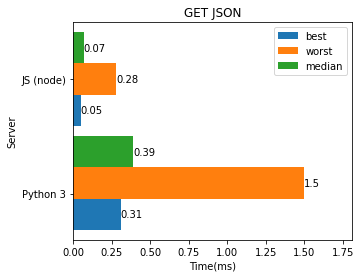

In [5]:
makePlot(plt,json_get_best,json_get_worst,json_get_median,'GET JSON')

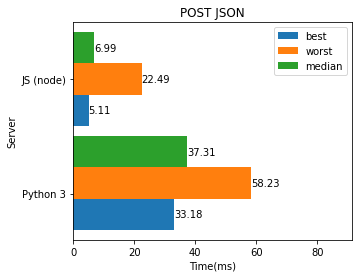

In [6]:
makePlot(plt,json_post_best,json_post_worst,json_post_median,'POST JSON')

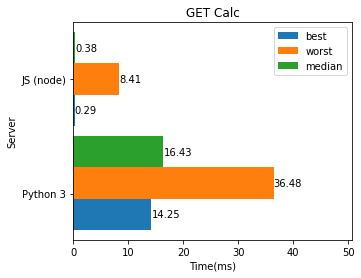

In [7]:
makePlot(plt,calc_get_best,calc_get_worst,calc_get_median,'GET Calc')

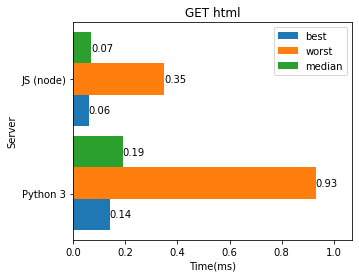

In [8]:
makePlot(plt,html_get_best,html_get_worst,html_get_median,'GET html')